In [2]:
import IPython
from scipy.io import wavfile
import scipy.signal
import numpy as np
import matplotlib.pyplot as plt
import librosa
import noisereduce as nr
import tensorflow
import soundfile
%matplotlib inline

/opt/anaconda3/lib/python3.7/site-packages/noisereduce/noisereduce.py:5: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [3]:
 import logmmse as lgm

In [4]:
import scipy

[   1   -5   -8 ...  451 1817 3051]


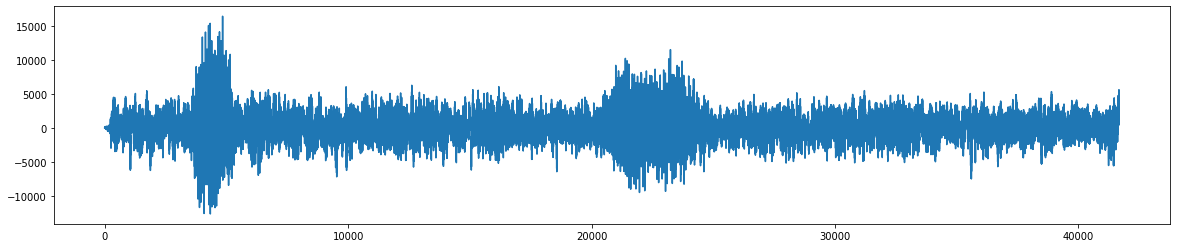

In [5]:
#loading audio file and playing audio file
rate, data = wavfile.read("Voice_Samples/set1/Noisy/sf1_n0H.wav")
fig, ax = plt.subplots(figsize=(20,4))
ax.plot(data)
print(data)
IPython.display.Audio(data=data, rate=rate)

[121  11 -34 ... 152  32  29]


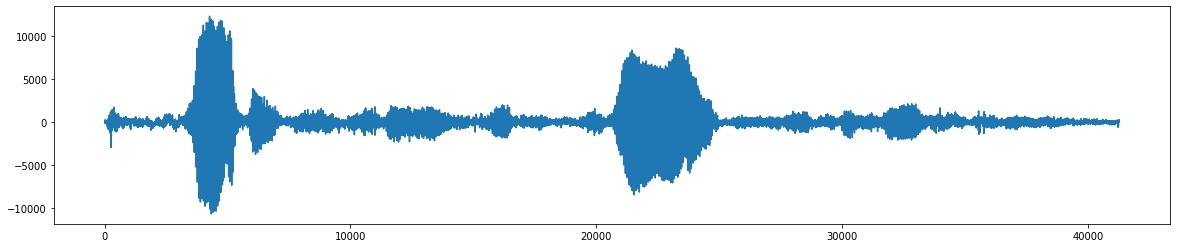

In [6]:
#after applying minimum mean squared estimation
out = lgm.logmmse(data = data,sampling_rate = rate,output_file='enhanced.wav',
                  initial_noise=6,window_size=0,noise_threshold=0.15)
print(out)
fig, ax = plt.subplots(figsize=(20,4))
ax.plot(out)
IPython.display.Audio(data=out, rate=rate)

In [74]:
temp = np.pad(out,(0,data.size - out.size),'constant',constant_values=(0,0))
x = data - temp
y = data - x 

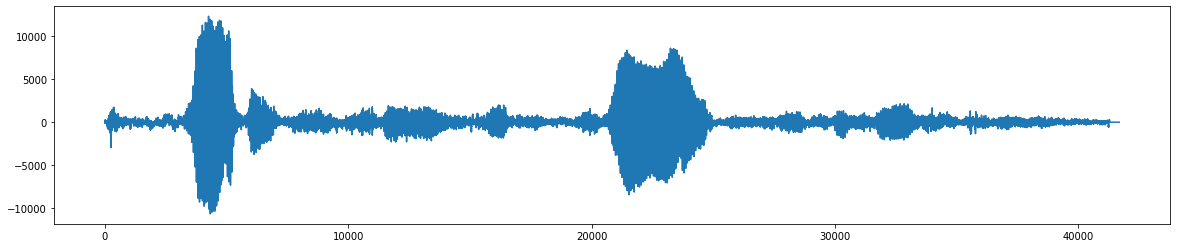

In [75]:
ig, ax = plt.subplots(figsize=(20,4))
ax.plot(y)
IPython.display.Audio(data=y, rate=rate)

[ 0  0  0 ... -1 -1 -1]


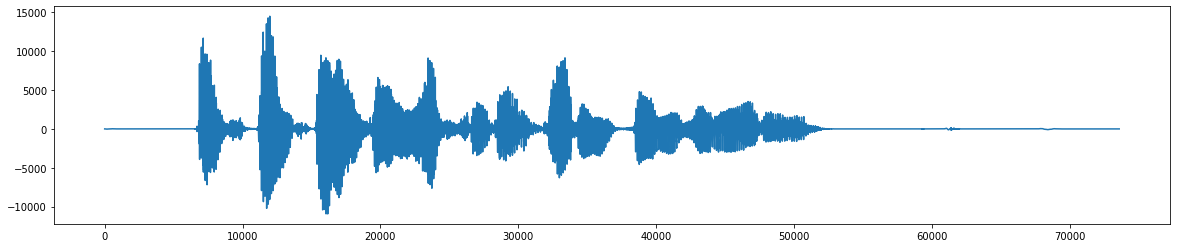

In [58]:
out = lgm.logmmse(data = y,sampling_rate = rate,output_file='enhanced.wav',initial_noise=6,window_size=0,noise_threshold=0.15)
print(out)
fig, ax = plt.subplots(figsize=(20,4))
ax.plot(out)
IPython.display.Audio(data=out, rate=rate)

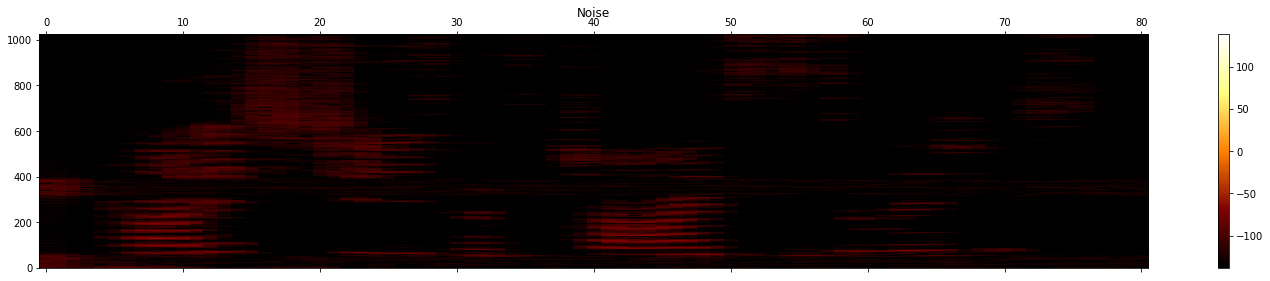

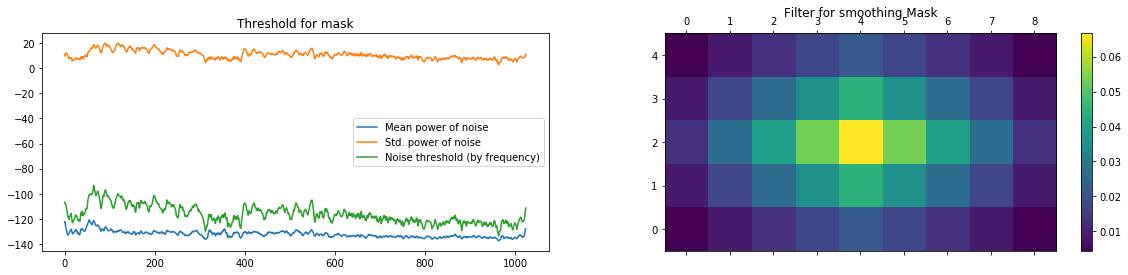

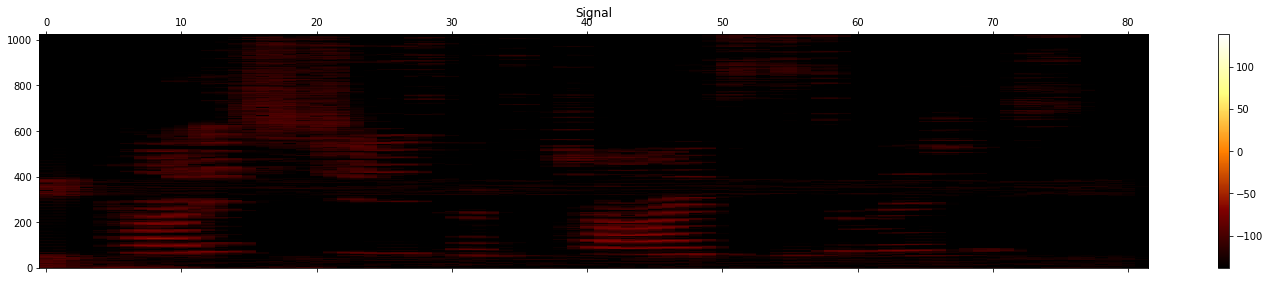

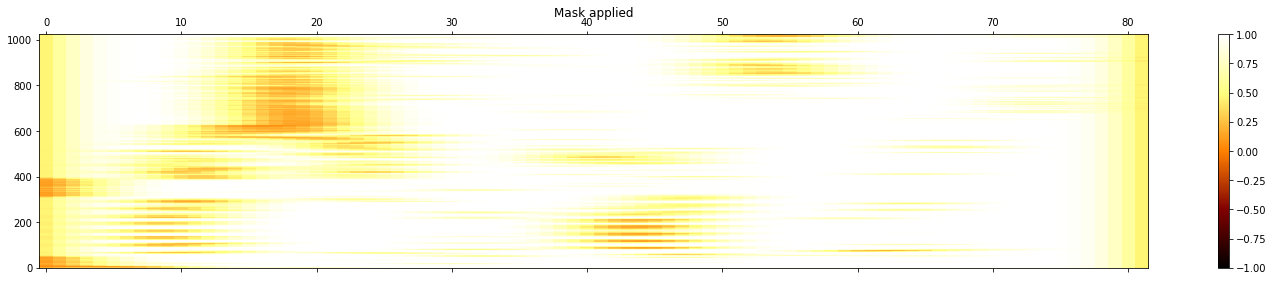

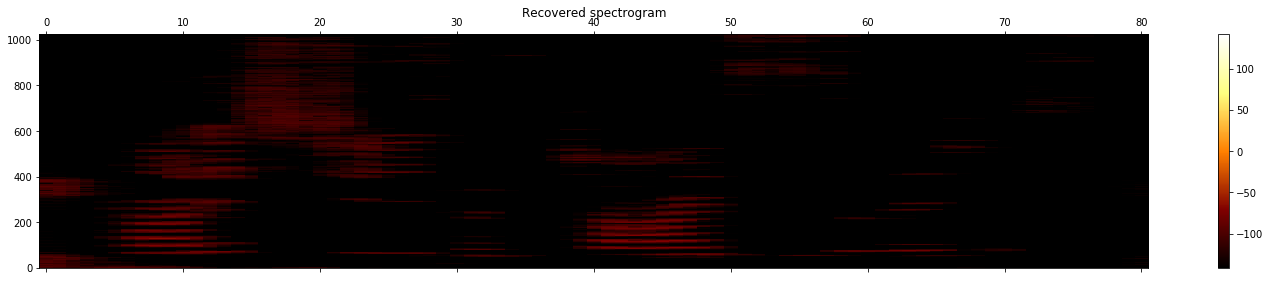

In [10]:
# perform noise reduction
out = out/32768
noisy_part = out[0:400000]

reduced_noise = nr.reduce_noise(audio_clip=out,noise_clip= noisy_part,
                                verbose=True,prop_decrease = 1.0)
IPython.display.Audio(data=reduced_noise, rate=rate)

[ 7.4273210e-09  6.6142740e-09  5.0487698e-09 ... -2.1589687e-11
 -9.7722264e-10 -1.5360769e-09]


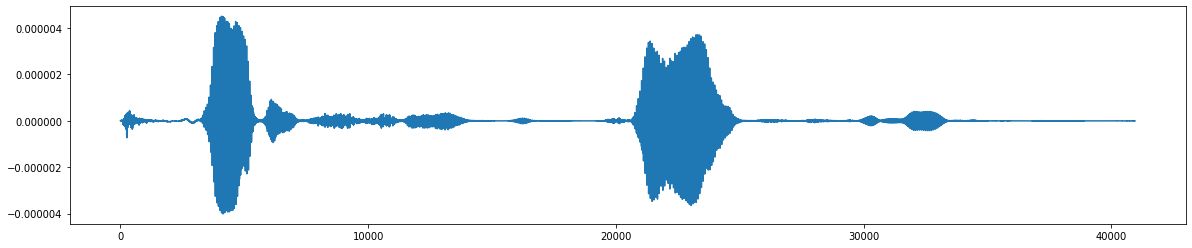

In [12]:
print(reduced_noise)
fig, ax = plt.subplots(figsize=(20,4))
ax.plot(reduced_noise)
IPython.display.Audio(data=reduced_noise, rate=rate)

[ 2.5353482e-09  2.4184061e-09  2.0357318e-09 ...  4.1950763e-09
  2.0882751e-09 -2.9139108e-10]


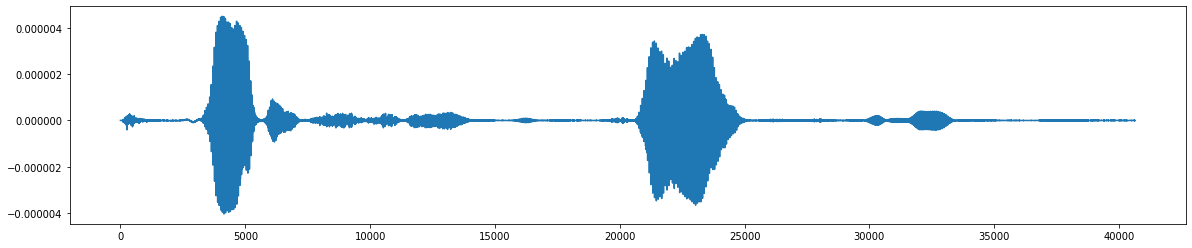

In [15]:
#re-enhancement / final output
out = lgm.logmmse(data = reduced_noise,sampling_rate = rate,
                  initial_noise=6,window_size=0,noise_threshold=0.15)
print(out)
fig, ax = plt.subplots(figsize=(20,4))
ax.plot(out)
IPython.display.Audio(data=out, rate=rate)

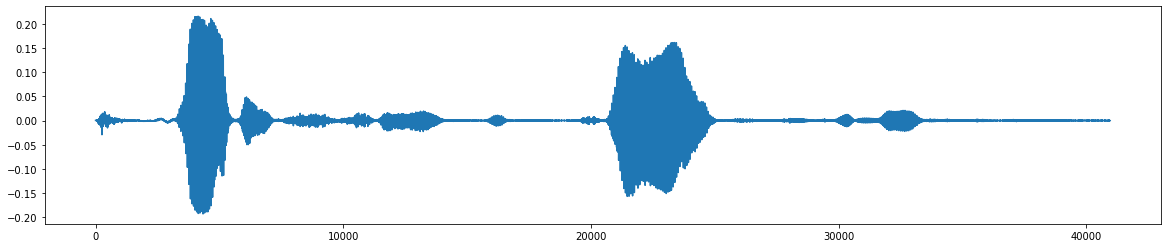

In [9]:
#Plot of the output file


In [62]:
out.size

73280

In [68]:
def NReAL_engine(filepath):
    rate, data = wavfile.read(filepath)
    #fig, ax = plt.subplots(figsize=(20,4))
    #ax.plot(data)
    #print(data)
    #IPython.display.Audio(data=data, rate=rate)
    out = lgm.logmmse(data = data,sampling_rate = rate,initial_noise=6,window_size=0,noise_threshold=0.15)
    #print(out)
    #fig, ax = plt.subplots(figsize=(20,4))
    #ax.plot(out)
    #IPython.display.Audio(data=out, rate=rate)
    #applying noise reduction
    out = out/32768
    noisy_part = out[0:400000]
    # perform noise reduction
    reduced_noise = nr.reduce_noise(audio_clip=out,noise_clip= noisy_part,verbose=True,prop_decrease = 1.0)
    #IPython.display.Audio(data=reduced_noise, rate=rate)
    #re-enhancement / final output
    out = lgm.logmmse(data = reduced_noise,sampling_rate = rate,initial_noise=6,window_size=0,noise_threshold=0.15)
    #print(out)
    #IPython.display.Audio(data=out, rate=rate)
    #Plot of the output file
    #fig, ax = plt.subplots(figsize=(20,4))
    #ax.plot(out*32768)
    return out

In [69]:
filepath = "samples/Sound Samples/_caustic_-20170306-smy/wav/en-0194.wav"

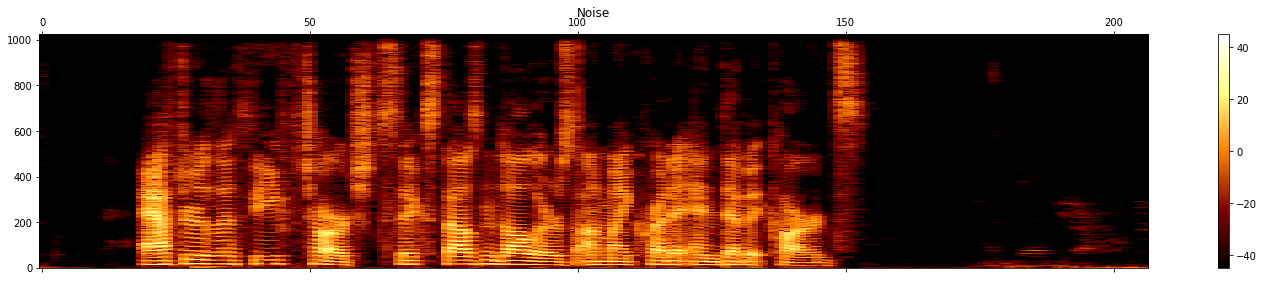

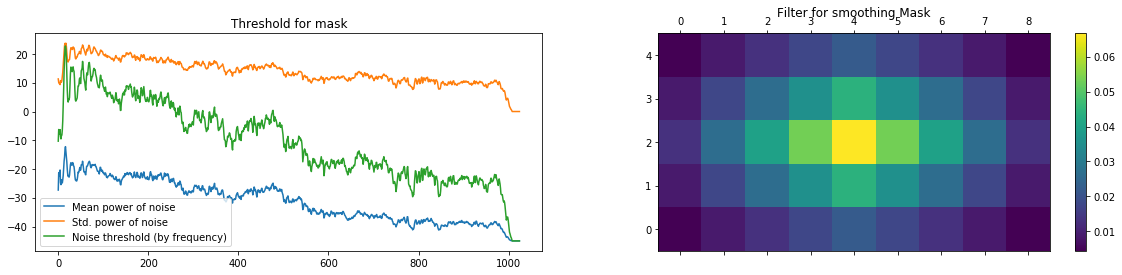

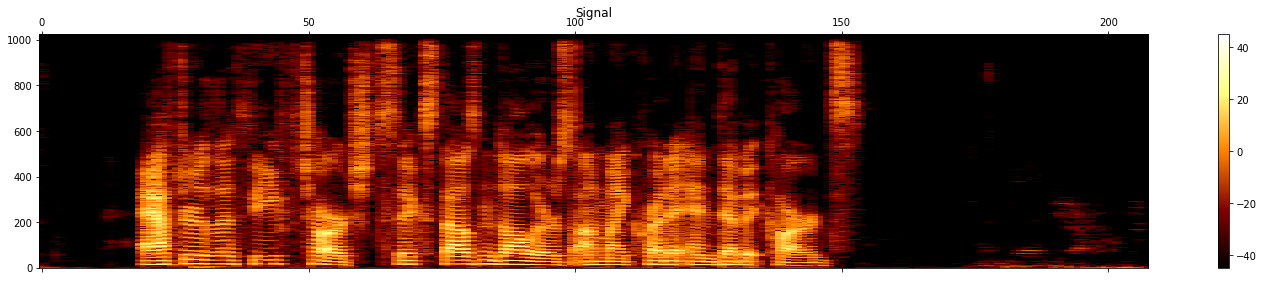

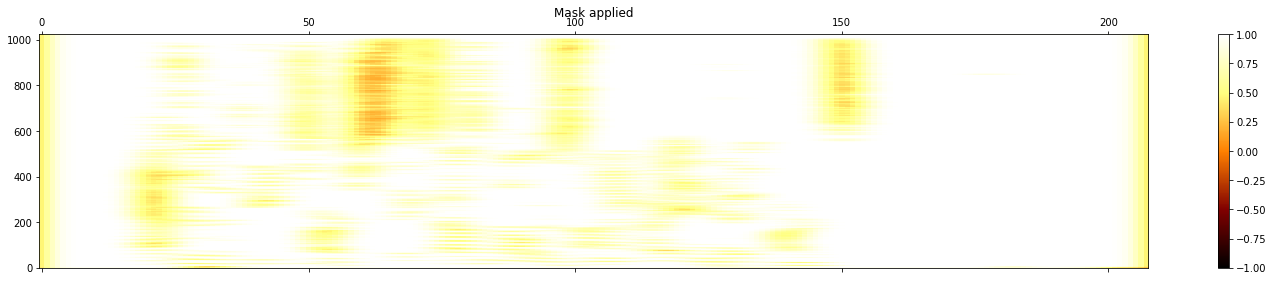

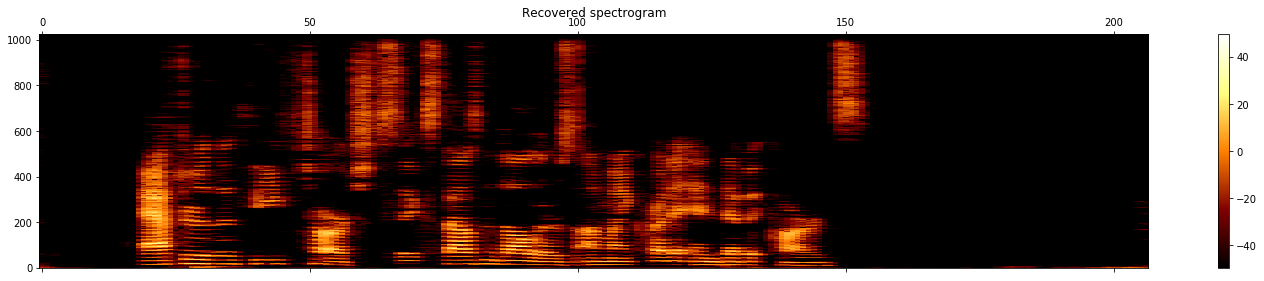

In [70]:
enhanced = NReAL_engine(filepath)

In [71]:
print(enhanced)
IPython.display.Audio(data=enhanced, rate=rate)

[ 2.0307309e-06  1.3547860e-06  2.2771467e-06 ... -8.4393844e-04
 -8.1861560e-04 -7.6992280e-04]
